In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Question 1 - Curse of Dimensionality

### GOALS:

#### i. Comparing volume of Hypersphere to Hypercube in different dimensions
#### ii. Calculating average distance to nearest points in different dimensions

In [2]:
# Create 1000 points for each D-dimensional space (D ∈ [1,15]) and keep them in a dictionary. Dimension values are
# randomly distributed between -1 and 1.

dim_dict = {}
fractions = {}

for D in range(1,16):
    dim_dict[D] = np.random.rand(1000,D)*2 - 1

In [3]:
# Here is how the first 10 points created in the 2D dimension looks like.
dim_dict[2][0:10]

array([[-0.04623226,  0.54893212],
       [-0.2619198 ,  0.28858415],
       [-0.53705788,  0.41796792],
       [-0.55169175,  0.61903404],
       [ 0.70925924, -0.77690927],
       [-0.10625878,  0.18274807],
       [ 0.56060331,  0.68701108],
       [-0.30384612, -0.09886514],
       [ 0.72728467,  0.88015089],
       [ 0.99180642, -0.15600472]])

### a) Fraction of points closer than 1 unit to origin

In [4]:
# Define a function to calculate the distance of a point to the origin
def dist_to_origin(point):
    length = 0
    for coordinate in point:
        length += coordinate*coordinate
    
    return length**0.5

In [5]:
# Calculate distances of the points and find the fraction of those that are closer than 1 unit

for key,value in dim_dict.items():
    dist_array = np.apply_along_axis(dist_to_origin,1,value)
    fraction = np.sum(dist_array<=1)/len(dist_array)
    fractions[key] = fraction

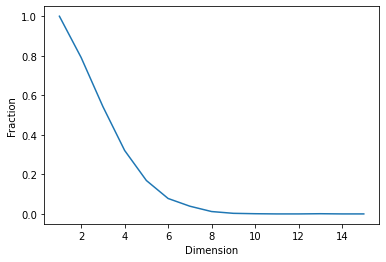

In [6]:
# Plot the dimension - fraction graph

plt.plot(fractions.keys(),fractions.values())
plt.xlabel("Dimension")
plt.ylabel("Fraction");

In [7]:
# As we can see, fraction of the points that are closer than 1 unit to the origin decreases because the euclidian distance
# is defined in such a way that every new dimension increases (or at least not decreases) the distance between two points.

### b) Estimation of π

### Volume of a unit circle := π * r^2 = c
### Volume of a unit sphere := (4/3) * π * r^3 = s
### c^3 / s^2 = 9π / 16 = Fraction(2)^3 / Fraction(3)^2
### π = 16 * Fraction(2)^3 / (9* Fraction(3)^2)

In [8]:
# Solve the above equation to find an estimation to π.

pi_estimate = 16*fractions[2]**3/(9*fractions[3]**2)
print("π is estimated as: "+ str(pi_estimate))

π is estimated as: 2.984058030457021


### c) Estimation of π with different sample sizes

In [9]:
# Create point samples with different sample sizes and dimensions

sizes = [500, 1000, 5000, 8000, 10000,25000, 35000, 40000,50000, 70000, 80000, 100000]
dim_dict_2 = {}
fractions_2 = {}

for size in sizes:
    for D in range(1,16):
        dim_dict_2["{0}dim{1}size".format(D,size)] = np.random.rand(size,D)*2 - 1

In [ ]:
# Calculate the fraction of points closer than 1 unit to the origin, for each point sample

for key,value in dim_dict_2.items():
    dist_array = np.apply_along_axis(dist_to_origin,1,value)
    fraction = np.sum(dist_array<=1)/len(dist_array)
    fractions_2[key] = fraction

In [ ]:
# Calculate the pi estimates by using fraction values of 2D and 3D for each different sample size

pi_estimates = {}
for size in sizes:
    pi_estimates[size] = 16*fractions_2["2dim{0}size".format(size)]**3/(9*fractions_2["3dim{0}size".format(size)]**2)

In [ ]:
# Plot the sample_size - pi_estimate graph

plt.plot(pi_estimates.keys(),pi_estimates.values())
plt.xlabel("Sample Size")
plt.ylabel("Pi Estimation");

### As we see, estimation starts with a high variation around the real pi value, but the variation decreases as the sample size increases

### d) Average of nearest neighbor distance values

In [ ]:
# Create D-dimensional samples and their test data, for D ∈ [1,15]

dim_dict_3 = {}
test_data = {}

for D in range(1,16):
    dim_dict_3[D] = np.random.rand(1000,D)*2 - 1

for D in range(1,16):
    test_data[D] = np.random.rand(100,D)*2 - 1

In [ ]:
# Define a function to calculate the distance between two points of the same dimension

def dist_between(x,y):
    
    if len(x)!=len(y):
        print("Points of unequal dimension")
        return 0
    
    length = 0
    for i in range(0,len(x)):
        length += (x[i]-y[i])**2
    
    return length**0.5

In [ ]:
# Calculate the mean distances to the nearest neighbors

mean_distances = {}

for D in range(1,16):
    min_distances = []
    
    for point_a in test_data[D]:
        distances_a = []
        
        for point_b in dim_dict_3[D]:
            distances_a.append(dist_between(point_a, point_b))
            
        min_distances.append(min(distances_a))
    
    mean_distances[D] = np.mean(min_distances)

In [ ]:
# Plot the mean distances

plt.plot(mean_distances.keys(),mean_distances.values())
plt.xlabel("Dimension")
plt.ylabel("Mean Distance");

In [ ]:
# Mean distance increases with dimension increase due to the interaction between euclidean distance and dimension increase.

# Question 2 - Data Manipulation on Images

### GOALS:

#### i. Understand the data type of the image files
#### ii. Manipulate the image files by playing with their matrix values

### a) Read the image

In [2]:
img = mpimg.imread("my_photo.jpg")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[214 220 218]
  [211 217 215]
  [207 213 211]
  ...
  [203 213 212]
  [203 213 212]
  [203 213 212]]

 [[214 220 218]
  [211 217 215]
  [207 213 211]
  ...
  [203 213 212]
  [203 213 212]
  [203 213 212]]

 [[213 219 217]
  [211 217 215]
  [208 214 212]
  ...
  [203 213 212]
  [202 212 211]
  [201 211 210]]]


In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(512, 512, 3)

#### Image is stored as an numpy.ndarray object and its dimensions are (512,512,3), meaning 512x512 RGB.

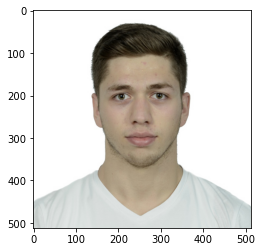

In [89]:
plt.imshow(img);

### b) Display each channel as seperate image

In [127]:
img_r = np.zeros(img.shape, dtype="uint8")
img_g = np.zeros(img.shape, dtype="uint8")
img_b = np.zeros(img.shape, dtype="uint8")
img_r[:,:,0] = img[:,:,0]
img_g[:,:,1] = img[:,:,1]
img_b[:,:,2] = img[:,:,2]

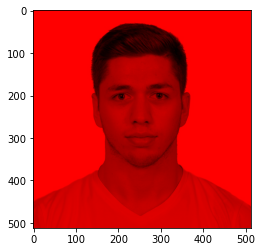

In [128]:
plt.imshow(img_r);

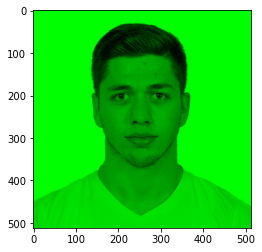

In [129]:
plt.imshow(img_g);

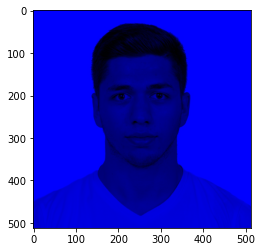

In [130]:
plt.imshow(img_b);

### c) Take average of columns for each channel and plot

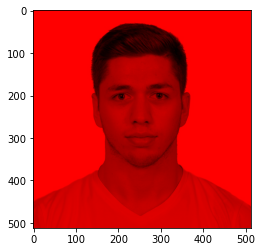

In [131]:
plt.imshow(img_r);

In [132]:
# Extract the channels from the filtered images

red_channel = img_r[:,:,0]
green_channel = img_g[:,:,1]
blue_channel = img_b[:,:,2]

In [133]:
# Take the mean of the columns for each channel

red_mean_list = []
for column in red_channel.T:
    red_mean_list.append(np.mean(column))
    
green_mean_list = []
for column in green_channel.T:
    green_mean_list.append(np.mean(column))
    
blue_mean_list = []
for column in blue_channel.T:
    blue_mean_list.append(np.mean(column))

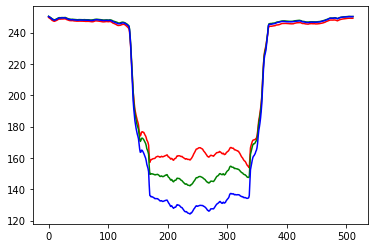

In [134]:
# Plot the means for each channel

plt.plot(red_mean_list, color="r")
plt.plot(green_mean_list,color="g")
plt.plot(blue_mean_list, color="b");

### d) Subtract one half of image from other half for each channel

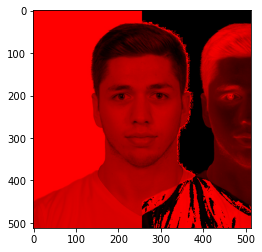

In [144]:
# For the red channel

red_channel_c = red_channel.copy()

red_first_half = red_channel_c[:,:256]
red_second_half = red_channel_c[:,256:]

red_second_half = red_second_half-red_first_half
red_second_half = red_second_half.clip(0)

red_channel_new = np.concatenate((red_first_half,red_second_half),axis=1)

subtracted_image_red = np.zeros(img.shape, dtype="uint8")
subtracted_image_red[:,:,0] = red_channel_new

plt.imshow(subtracted_image_red);

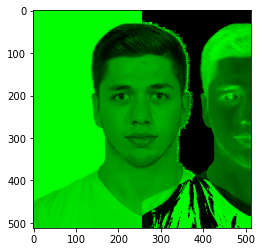

In [145]:
# For the green channel

green_channel_c = green_channel.copy()

green_first_half = green_channel_c[:,:256]
green_second_half = green_channel_c[:,256:]

green_second_half = green_second_half-green_first_half
green_second_half = green_second_half.clip(0)

green_channel_new = np.concatenate((green_first_half,green_second_half),axis=1)

subtracted_image_green = np.zeros(img.shape, dtype="uint8")
subtracted_image_green[:,:,1] = green_channel_new

plt.imshow(subtracted_image_green);

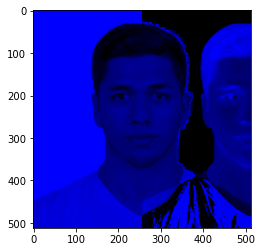

In [146]:
# For the blue channel

blue_channel_c = blue_channel.copy()

blue_first_half = blue_channel_c[:,:256]
blue_second_half = blue_channel_c[:,256:]

blue_second_half = blue_second_half-blue_first_half
blue_second_half = blue_second_half.clip(0)

blue_channel_new = np.concatenate((blue_first_half,blue_second_half),axis=1)

subtracted_image_blue = np.zeros(img.shape, dtype="uint8")
subtracted_image_blue[:,:,2] = blue_channel_new

plt.imshow(subtracted_image_blue);

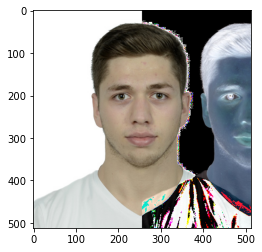

In [148]:
# Display the new image

subtracted_image_full = np.zeros(img.shape, dtype="uint8")

subtracted_image_full[:,:,0] = subtracted_image_red[:,:,0]
subtracted_image_full[:,:,1] = subtracted_image_green[:,:,1]
subtracted_image_full[:,:,2] = subtracted_image_blue[:,:,2]

plt.imshow(subtracted_image_full);

### e) Create noisy image

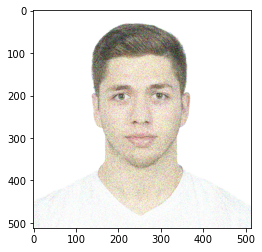

In [183]:
img_for_noisy = img.copy()
noise = np.random.rand(*img.shape)*255*0.5

noisy_img = img_for_noisy + noise
noisy_img = noisy_img.clip(0,255)
noisy_img_int = noisy_img.astype(int)

plt.imshow(noisy_img_int);

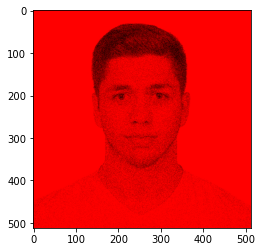

In [184]:
# Noisy red image

noisy_red = np.zeros(noisy_img_int.shape, dtype="uint8")
noisy_red[:,:,0] = noisy_img_int[:,:,0]
plt.imshow(noisy_red);

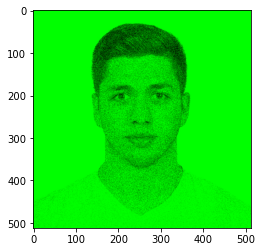

In [185]:
# Noisy green image

noisy_green = np.zeros(noisy_img_int.shape, dtype="uint8")
noisy_green[:,:,1] = noisy_img_int[:,:,1]
plt.imshow(noisy_green);

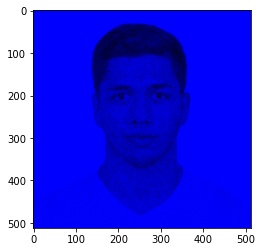

In [186]:
# Noisy blue image

noisy_blue = np.zeros(noisy_img_int.shape, dtype="uint8")
noisy_blue[:,:,2] = noisy_img_int[:,:,2]
plt.imshow(noisy_blue);

In [189]:
import os

os.system('jupyter nbconvert --to html HW1.ipynb')

0